<a href="https://colab.research.google.com/github/jeffheaton/app_deep_learning/blob/main/t81_558_class_02_1_python_pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# T81-558: Applications of Deep Neural Networks

**Module 2: Python for Machine Learning**

- Instructor: [Jeff Heaton](https://sites.wustl.edu/jeffheaton/), McKelvey School of Engineering, [Washington University in St. Louis](https://engineering.wustl.edu/Programs/Pages/default.aspx)
- For more information visit the [class website](https://sites.wustl.edu/jeffheaton/t81-558/).


# Module 2 Material

Main video lecture:

- **Part 2.1: Introduction to Pandas** [[Video]](https://www.youtube.com/watch?v=wixHCvnvnsU&list=PLjy4p-07OYzuy_lHcRW8lPTLPTTOmUpmi) [[Notebook]](t81_558_class_02_1_python_pandas.ipynb)
- Part 2.2: Categorical Values [[Video]](https://www.youtube.com/watch?v=Fm7Ax23hDP0&list=PLjy4p-07OYzuy_lHcRW8lPTLPTTOmUpmi) [[Notebook]](t81_558_class_02_2_pandas_cat.ipynb)
- Part 2.3: Grouping, Sorting, and Shuffling in Python Pandas [[Video]](https://www.youtube.com/watch?v=tUhaD8xWd7k&list=PLjy4p-07OYzuy_lHcRW8lPTLPTTOmUpmi) [[Notebook]](t81_558_class_02_3_pandas_grouping.ipynb)
- Part 2.4: Using Apply and Map in Pandas [[Video]](https://www.youtube.com/watch?v=YNo_mg1RrkM&list=PLjy4p-07OYzuy_lHcRW8lPTLPTTOmUpmi) [[Notebook]](t81_558_class_02_4_pandas_functional.ipynb)
- Part 2.5: Feature Engineering in Pandas for Deep Learning in PyTorch [[Video]](https://www.youtube.com/watch?v=ezaVtM405Qs&list=PLjy4p-07OYzuy_lHcRW8lPTLPTTOmUpmi) [[Notebook]](t81_558_class_02_5_pandas_features.ipynb)


# Google CoLab Instructions

The following code ensures that Google CoLab is running and maps Google Drive if needed.


In [1]:
try:
    from google.colab import drive

    COLAB = True
    print("Note: using Google CoLab")
except:
    print("Note: not using Google CoLab")
    COLAB = False

Note: not using Google CoLab


# Part 2.1: Introduction to Pandas

[Pandas](http://pandas.pydata.org/) is an open-source library providing high-performance, easy-to-use data structures and data analysis tools for the Python programming language. It is based on the [dataframe](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html) concept found in the [R programming language](https://www.r-project.org/about.html). For this class, Pandas will be the primary means by which we manipulate data to be processed by neural networks.

The data frame is a crucial component of Pandas. We will use it to access the [auto-mpg dataset](https://archive.ics.uci.edu/ml/datasets/Auto+MPG). You can find this dataset on the UCI machine learning repository. For this class, we will use a version of the Auto MPG dataset, where I added column headers. You can find my [version](https://data.heatonresearch.com/data/t81-558/auto-mpg.csv) at [https://data.heatonresearch.com/](https://data.heatonresearch.com/).

UCI took this dataset from the StatLib library, which Carnegie Mellon University maintains. The dataset was used in the 1983 American Statistical Association Exposition. It contains data for 398 cars, including [mpg](https://en.wikipedia.org/wiki/Fuel_economy_in_automobiles), [cylinders](<https://en.wikipedia.org/wiki/Cylinder_(engine)>), [displacement](https://en.wikipedia.org/wiki/Engine_displacement), [horsepower](https://en.wikipedia.org/wiki/Horsepower) , weight, acceleration, model year, origin and the car's name.

The following code loads the MPG dataset into a data frame:


In [2]:
import os
import pickle
import numpy as np
import pandas as pd
from pathlib import Path
from sklearn.model_selection import train_test_split

In [3]:
# Simple dataframe
pd.set_option("display.max_columns", 20)
df = pd.read_csv("https://data.heatonresearch.com/data/t81-558/auto-mpg.csv")
display(df[0:5])
df.info()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   year          398 non-null    int64  
 7   origin        398 non-null    int64  
 8   name          398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


The **display** function provides a cleaner display than merely printing the data frame. Specifying the maximum rows and columns allows you to achieve greater control over the display.


In [4]:
pd.set_option("display.max_columns", 20)
pd.set_option("display.max_rows", 50)
display(df)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


It is possible to generate a second data frame to display statistical information about the first data frame.


In [5]:
df.describe()

,mpg,cylinders,displacement,weight,acceleration,year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [6]:
# Strip non-numerics
df = df.select_dtypes(include=["int", "float"])

headers = list(df.columns.values)
fields = []

for field in headers:
    fields.append(
        {
            "name": field,
            "mean": df[field].mean(),
            "var": df[field].var(),
            "sdev": df[field].std(),
        }
    )

for field in fields:
    print(field)

{'name': 'mpg', 'mean': 23.514572864321607, 'var': 61.089610774274405, 'sdev': 7.815984312565782}
{'name': 'cylinders', 'mean': 5.454773869346734, 'var': 2.893415439920003, 'sdev': 1.7010042445332119}
{'name': 'displacement', 'mean': 193.42587939698493, 'var': 10872.199152247384, 'sdev': 104.26983817119591}
{'name': 'weight', 'mean': 2970.424623115578, 'var': 717140.9905256763, 'sdev': 846.8417741973268}
{'name': 'acceleration', 'mean': 15.568090452261307, 'var': 7.604848233611383, 'sdev': 2.757688929812676}
{'name': 'year', 'mean': 76.01005025125629, 'var': 13.672442818627143, 'sdev': 3.697626646732623}
{'name': 'origin', 'mean': 1.5728643216080402, 'var': 0.6432920268850549, 'sdev': 0.8020548777266148}


Certainly! Let's dissect this code snippet, step by step, to unravel its functionalities:

### Step 1: Selecting Numeric Columns

```python
df = df.select_dtypes(include=["int", "float"])
```

- **Purpose**: This line filters the DataFrame `df` to include only columns with data types `int` (integer) and `float` (floating-point number).
- **How it works**: `select_dtypes` is a method in pandas that selects columns in a DataFrame based on their data type. Here, it's configured to include columns whose data type is either `int` or `float`. 
- **Result**: The DataFrame `df` is modified to only contain these numeric columns.

### Step 2: Extracting Column Headers

```python
headers = list(df.columns.values)
```

- **Purpose**: This line extracts the column names (headers) of the modified DataFrame.
- **How it works**: `df.columns` returns an Index object containing the column labels of the DataFrame. `df.columns.values` converts this Index into an array, and `list()` then converts this array into a list.
- **Result**: `headers` is a list containing the names of all numeric columns in `df`.

### Step 3: Initializing an Empty List for Field Summaries

```python
fields = []
```

- **Purpose**: This line initializes an empty list named `fields`. This list will be used to store dictionaries, each containing statistical summaries for a column in `df`.

### Step 4: Looping Over Columns and Calculating Statistics

```python
for field in headers:
    fields.append(
        {
            "name": field,
            "mean": df[field].mean(),
            "var": df[field].var(),
            "sdev": df[field].std(),
        }
    )
```

- **Purpose**: This loop iterates over each column name in `headers` and computes statistics for each column.
- **Details**:
  - **`"name": field`**: Stores the name of the column.
  - **`"mean": df[field].mean()`**: Calculates and stores the mean (average) of the column.
  - **`"var": df[field].var()`**: Calculates and stores the variance of the column. Variance measures how much the data points in a column are spread out from their average value.
  - **`"sdev": df[field].std()`**: Calculates and stores the standard deviation of the column, which is a measure of the amount of variation or dispersion in the column.
- **Result**: Each iteration appends a dictionary with these statistics for a specific column to the list `fields`.

### Step 5: Printing the Field Summaries

```python
for field in fields:
    print(field)
```

- **Purpose**: This loop goes through each dictionary in the `fields` list and prints it.
- **How it works**: Each `field` in the `fields` list is a dictionary containing statistical summaries for a column. This loop prints each of these dictionaries.
- **Result**: The console (or output cell) displays the statistical summaries (mean, variance, standard deviation) for each numeric column in the DataFrame `df`.

### Summary

In essence, this code snippet is a data analysis tool for a pandas DataFrame. It filters out non-numeric columns, calculates basic statistical measures (mean, variance, standard deviation) for each numeric column, and prints these statistics in a readable format. This can be particularly useful for getting a quick overview of the numerical data in a DataFrame.

In [7]:
pd.set_option("display.max_columns", 0)
pd.set_option("display.max_rows", 0)
df2 = pd.DataFrame(fields)
display(df2)

,name,mean,var,sdev
0,mpg,23.514573,61.089611,7.815984
1,cylinders,5.454774,2.893415,1.701004
2,displacement,193.425879,10872.199152,104.269838
3,weight,2970.424623,717140.990526,846.841774
4,acceleration,15.568090,7.604848,2.757689
5,year,76.010050,13.672443,3.697627
6,origin,1.572864,0.643292,0.802055


This code outputs a list of dictionaries that hold this statistical information. This information looks similar to the JSON code seen in Module 1. If proper JSON is needed, the program should add these records to a list and call the Python JSON library's **dumps** command.

The Python program can convert this JSON-like information to a data frame for better display.


Lets conver that into a function for future use shall we.


In [8]:
import pandas as pd

def create_summary_dataframe(df, *dtypes):
    """
    Creates a summary DataFrame from specified fields of the input DataFrame.

    Args:
    df (pd.DataFrame): The DataFrame to be summarized.
    *dtypes: The data types to include in the summary.

    Returns:
    pd.DataFrame: A DataFrame containing summaries (mean, variance, standard deviation) of specified fields.
    """
    # Select columns of specified data types
    selected_df = df.select_dtypes(include=dtypes)

    headers = list(selected_df.columns.values)
    fields = []

    # Calculate statistics for each field
    for field in headers:
        fields.append(
            {
                "name": field,
                "mean": selected_df[field].mean(),
                "var": selected_df[field].var(),
                "sdev": selected_df[field].std(),
            }
        )

    # Create a new DataFrame from the fields
    
    return pd.DataFrame(fields)

# Example usage:
summary_df = create_summary_dataframe(df, "int", "float")
display(summary_df)


,name,mean,var,sdev
0,mpg,23.514573,61.089611,7.815984
1,cylinders,5.454774,2.893415,1.701004
2,displacement,193.425879,10872.199152,104.269838
3,weight,2970.424623,717140.990526,846.841774
4,acceleration,15.568090,7.604848,2.757689
5,year,76.010050,13.672443,3.697627
6,origin,1.572864,0.643292,0.802055


## Missing Values

Missing values are an inescapable aspect of data handling in machine learning, often leading to the necessity of making decisions on how to deal with them effectively. It's not uncommon to encounter datasets where some columns are incomplete. For instance, in the MPG database, while most columns are filled, the 'horsepower' column has some missing values. A standard method to address this issue is to fill in these missing values with a representative statistic of the column. The median is frequently chosen for this purpose, and there's a good reason for that.

The choice between using the mean (average) and the median (the middle value when all values are sorted) to fill in missing values hinges on the nature of the data, particularly its susceptibility to outliers. The mean is sensitive to extreme values, or outliers, which can skew the average significantly, leading to a misleading fill value. The median, on the other hand, is more robust in the presence of outliers, as it is merely the middle value and unaffected by how extreme the outliers are.

Let's illustrate this with an example involving the calculation of net worth:

### Example: Calculating Missing Net Worth Values

Imagine you're assessing the net worth of a group of ordinary individuals. Most have net worths ranging from $50,000 to $200,000. The mean and median of this group would likely be close to each other, within this range, making either a reasonable choice for filling in missing values.

However, suppose you then include Elon Musk, with a net worth in the billions, into this group. His inclusion would dramatically increase the mean net worth, potentially to a figure in the tens or hundreds of millions. This is clearly not representative of the group as a whole. In such a case, the median, likely still within the $50,000 to $200,000 range, remains a more accurate representation of an "average" person in the dataset.

### Using Median in the MPG Database Example

Applying this concept to the MPG database, if 'horsepower' data has outliers (such as a few cars with exceptionally high horsepower), using the mean to fill missing values could give a skewed impression, suggesting cars are generally more powerful than they are. The median, unaffected by these extreme values, provides a more realistic fill value, representing a typical car in the database.

In summary, the median is preferred over the mean for filling missing values in scenarios where the data is skewed or contains outliers. This approach ensures a more accurate and representative treatment of the missing data, especially important in machine learning where data quality significantly impacts model performance.


In [9]:
url = "https://data.heatonresearch.com/data/t81-558/auto-mpg.csv"
mpg_data = pd.read_csv(url, na_values=["NA", "?"])
mpg_data.sample(5, random_state=43)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
102,26.0,4,97.0,46.0,1950,21.0,73,2,volkswagen super beetle
210,19.0,6,156.0,108.0,2930,15.5,76,3,toyota mark ii
136,16.0,8,302.0,140.0,4141,14.0,74,1,ford gran torino
64,15.0,8,318.0,150.0,4135,13.5,72,1,plymouth fury iii
208,13.0,8,318.0,150.0,3940,13.2,76,1,plymouth volare premier v8


`na_values=["NA", "?"]`: This parameter within the `read_csv` function specifies additional strings to recognize as NA/NaN (Not a Number). By default, pandas recognizes strings like '', '#N/A', '#N/A N/A', '#NA', '-1.#IND', '-1.#QNAN', '-NaN', '-nan', '1.#IND', '1.#QNAN', 'N/A', 'NA', 'NULL', 'NaN', 'n/a', 'nan', 'null'. In this case, "NA" and "?" are added to this list, meaning that if the CSV file contains these values, pandas will interpret them as missing values.

In [10]:
print(f"horsepower has Nan? {pd.isnull(mpg_data['horsepower']).values.any()}")

horsepower has Nan? True


In [11]:
def fill_na(df):
    return (df
            .assign(horsepower = df["horsepower"]
                    .fillna(df["horsepower"].median()))
           )

mpg_data = fill_na(mpg_data)
mpg_data.sample(5, random_state=43)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
102,26.0,4,97.0,46.0,1950,21.0,73,2,volkswagen super beetle
210,19.0,6,156.0,108.0,2930,15.5,76,3,toyota mark ii
136,16.0,8,302.0,140.0,4141,14.0,74,1,ford gran torino
64,15.0,8,318.0,150.0,4135,13.5,72,1,plymouth fury iii
208,13.0,8,318.0,150.0,3940,13.2,76,1,plymouth volare premier v8


In [12]:
print(f"horsepower has NaN? {pd.isnull(mpg_data['horsepower']).values.any()}")

horsepower has NaN? False


## Dealing with Outliers

Outliers are data points that significantly differ from other observations in a dataset. They appear as unusually high or low values compared to the rest. Commonly, outliers are defined as values that lie at a considerable distance from the mean, often more than a few standard deviations away. Their presence can be attributed to various factors: sometimes they're the result of errors in data collection or entry, and other times they represent actual but rare occurrences that deviate markedly from the norm.

Addressing outliers is crucial because they can skew statistical analyses and distort the overall data interpretation, leading to misleading results. One common method to handle outliers is to remove them from the dataset. This can be done programmatically by defining a threshold, such as values that are a certain number of standard deviations away from the mean, and then excluding these from analyses.

### Visual Inspection of Outliers:

Besides numerical methods, visual techniques are often employed to identify outliers. Plots are a powerful tool for this:

1. **Box Plot**: A box plot is a standardized way of displaying the dataset based on a five-number summary: minimum, first quartile (Q1), median, third quartile (Q3), and maximum. It can provide a visual indication of the distribution of the data, highlighting potential outliers. In a box plot, outliers are typically indicated by dots or asterisks outside the 'whiskers'.

2. **Scatter Plot**: Useful particularly for bivariate data, scatter plots allow you to see the full distribution of the data points. Outliers are easily spotted as points that fall far away from the cloud of other data points.

3. **Histogram**: While histograms don't pinpoint outliers as precisely as box plots, they're useful for understanding the distribution of your data. Outliers may cause the histogram to be skewed or have a very long tail.

By combining both visual and analytical methods, you can more effectively detect and handle outliers, leading to more robust and reliable data analysis.


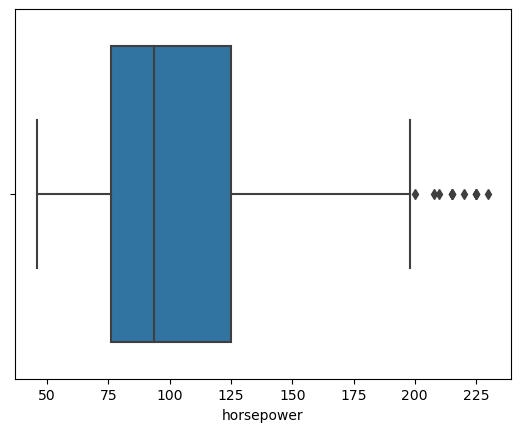

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame and 'column_name' is the name of the column
sns.boxplot(x=mpg_data['horsepower'])
plt.show();


### 1. First Function:
```python
def remove_outliers(df, name, sd):
    drop_rows = (df.index[(np.abs(df[name] - df[name].mean())
                          >= (sd * df[name].std()))])
    df.drop(drop_rows, axis=0, inplace=True)
```
- **Functionality**: This function identifies rows where the value in the specified column (`name`) deviates from the mean by more than `sd` standard deviations. It then directly drops these rows from the original DataFrame `df`.
- **In-Place Modification**: It modifies the DataFrame in place, meaning the original DataFrame `df` is changed and rows are permanently removed.
- **Return Value**: It doesn't return anything since the operation is done in place.

### 2. Second Function:
```python
def remove_outliers(df, name, sd):
    return df[(np.abs(df[name] - df[name].mean()) < (sd * df[name].std()))]
```
- **Functionality**: Similar to the first, this function identifies rows to keep, those where the value in `name` is within `sd` standard deviations from the mean.
- **Non-Destructive**: It returns a new DataFrame with the outliers removed. The original DataFrame `df` is not modified.
- **Return Value**: Returns the modified DataFrame, which needs to be captured or assigned to a variable if the change is to be retained.

### 3. Third Function:
```python
def remove_outliers(df, name, sd):
    condition = (np.abs(df[name] - df[name].mean()) >= (sd * df[name].std()))
    return df[~condition]
```
- **Functionality**: This function calculates a condition that identifies outliers (similar to the first function) but uses the negation of this condition (`~condition`) to keep the non-outliers.
- **Non-Destructive**: Like the second function, it returns a new DataFrame with outliers removed, leaving the original DataFrame unchanged.
- **Return Value**: Returns a new DataFrame where rows considered outliers have been removed.

### Removing Outliers Based on Standard Deviation:

The rationale behind using standard deviation to identify outliers is based on the properties of the normal distribution (bell curve):
- In a normal distribution, about 68% of the data falls within one standard deviation of the mean, 95% within two standard deviations, and 99.7% within three standard deviations.
- Therefore, points that fall several standard deviations away from the mean (commonly more than 2 or 3) are rare under a normal distribution and can be considered outliers.
- This method is effective for data that approximates a normal distribution but may not be as appropriate for other distributions.

By using standard deviation as a measure to filter out outliers, these functions aim to eliminate data points that are statistically unusual and could potentially skew the analysis.n explicit `condition` variable for clarity.

The code below will drop every row from the Auto MPG dataset where the horsepower is two standard deviations or more above or below the mean.


In [14]:
(pd.read_csv(url, na_values=["NA", "?"])
).isna().sum().sum()

6

In [15]:
raw = (pd.read_csv(url, na_values=["NA", "?"])
)

print(raw.columns.to_list())

['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year', 'origin', 'name']


In [16]:
def clean_data(data):
    return (data
     .assign(horsepower = lambda x: x['horsepower']
             .fillna(x['horsepower'].median())
            )
     .drop("name", axis=1)
     )

df = clean_data(raw)
print(f"Length before MPG outliers dropped: {len(df)}")
df.sample(5, random_state=43)

Length before MPG outliers dropped: 398


,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
102,26.0,4,97.0,46.0,1950,21.0,73,2
210,19.0,6,156.0,108.0,2930,15.5,76,3
136,16.0,8,302.0,140.0,4141,14.0,74,1
64,15.0,8,318.0,150.0,4135,13.5,72,1
208,13.0,8,318.0,150.0,3940,13.2,76,1


In [17]:
def remove_outliers(df, name, sd):
    condition = (np.abs(df[name] - df[name].mean()) >= (sd * df[name].std()))
    return df[~condition]

In [18]:
def clean_data(data):
    return (data
     .assign(horsepower = lambda x: x['horsepower']
             .fillna(x['horsepower'].median())
            )
     .pipe(remove_outliers, "mpg", 2)
     .drop("name", axis=1)
     )

df = clean_data(raw)
print(f"Length after MPG outliers dropped: {len(df)}")
df.sample(5, random_state=43)

Length after MPG outliers dropped: 388


,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
142,26.0,4,79.0,67.0,1963,15.5,74,2
297,25.4,5,183.0,77.0,3530,20.1,79,2
82,23.0,4,120.0,97.0,2506,14.5,72,3
397,31.0,4,119.0,82.0,2720,19.4,82,1
44,13.0,8,400.0,175.0,5140,12.0,71,1


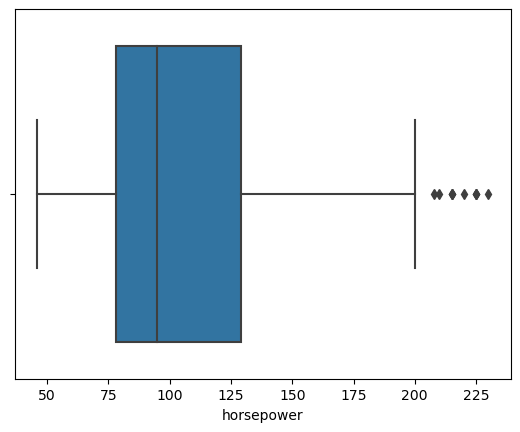

In [19]:
sns.boxplot(x=df['horsepower'])
plt.show();

## Dropping Fields

You must drop fields that are of no value to the neural network. The following code removes the name column from the MPG dataset.


## Concatenating Rows and Columns

Python can concatenate rows and columns together to form new data frames. The code below creates a new data frame from the **name** and **horsepower** columns from the Auto MPG dataset. The program does this by concatenating two columns together.


In [20]:
# Create a new dataframe from name and horsepower

raw = pd.read_csv(url, na_values=["NA", "?"])

def concat_columns(df1, df2, col_name1, col_name2):
    """
    Concatenates two columns from potentially different DataFrames with a similar index.

    Args:
    df1 (pd.DataFrame): The first DataFrame.
    df2 (pd.DataFrame): The second DataFrame (can be the same as df1).
    col_name1 (str): The column name to be taken from df1.
    col_name2 (str): The column name to be taken from df2.

    Returns:
    pd.DataFrame: A DataFrame containing the concatenated columns.
    """
    return pd.concat([
        df1[col_name1],
        df2[col_name2]
    ], axis=1)


result = concat_columns(raw, raw, "horsepower", "name")

pd.set_option("display.max_columns", 0)
pd.set_option("display.max_rows", 0)
df.sample(10, random_state=43)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
142,26.0,4,79.0,67.0,1963,15.5,74,2
297,25.4,5,183.0,77.0,3530,20.1,79,2
82,23.0,4,120.0,97.0,2506,14.5,72,3
397,31.0,4,119.0,82.0,2720,19.4,82,1
44,13.0,8,400.0,175.0,5140,12.0,71,1
62,13.0,8,350.0,165.0,4274,12.0,72,1
117,29.0,4,68.0,49.0,1867,19.5,73,2
20,25.0,4,110.0,87.0,2672,17.5,70,2
195,29.0,4,85.0,52.0,2035,22.2,76,1
349,34.1,4,91.0,68.0,1985,16.0,81,3


The **concat** function can also concatenate rows together. This code concatenates the first two rows and the last two rows of the Auto MPG dataset.


In [21]:
# Create a new dataframe from first 2 rows and last 2 rows

raw = pd.read_csv(url, na_values=["NA", "?"])

result = pd.concat([raw[0:2], raw[-2:]], axis=0)

pd.set_option("display.max_columns", 7)
pd.set_option("display.max_rows", 0)
display(result)

,mpg,cylinders,displacement,...,year,origin,name
0,18.0,8,307.0,...,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,...,70,1,buick skylark 320
396,28.0,4,120.0,...,82,1,ford ranger
397,31.0,4,119.0,...,82,1,chevy s-10


## Training and Validation

We must evaluate a machine learning model based on its ability to predict values that it has never seen before. Because of this, we often divide the training data into a validation and training set. The machine learning model will learn from the training data but ultimately be evaluated based on the validation data.

- **Training Data** - **In Sample Data** - The data that the neural network used to train.
- **Validation Data** - **Out of Sample Data** - The data that the machine learning model is evaluated upon after it is fit to the training data.

There are two effective means of dealing with training and validation data:

- **Training/Validation Split** - The program splits the data according to some ratio between a training and validation (hold-out) set. Typical rates are 80% training and 20% validation.
- **K-Fold Cross Validation** - The program splits the data into several folds and models. Because the program creates the same number of models as folds, the program can generate out-of-sample predictions for the entire dataset.

The code below splits the MPG data into a training and validation set. The training set uses 80% of the data, and the validation set uses 20%. Figure 2.TRN-VAL shows how we train a model on 80% of the data and then validated against the remaining 20%.

**Figure 2.TRN-VAL: Training and Validation**
![Training and Validation](https://raw.githubusercontent.com/jeffheaton/t81_558_deep_learning/master/images/class_1_train_val.png "Training and Validation")


In [22]:
df = pd.read_csv(url, na_values=["NA", "?"])

# Usually a good idea to shuffle
df = df.reindex(np.random.permutation(df.index))

mask = np.random.rand(len(df)) < 0.8
trainDF = pd.DataFrame(df[mask])
validationDF = pd.DataFrame(df[~mask])

print(f"Training DF: {len(trainDF)}")
print(f"Validation DF: {len(validationDF)}")

Training DF: 319
Validation DF: 79


This code snippet is performing data preparation for machine learning or statistical modeling, particularly splitting a dataset into training and validation sets. Let's break it down step by step:

### Step 1: Reading the Data
```python
df = pd.read_csv(url, na_values=["NA", "?"])
```
- This line reads data from a CSV file (from the given `url`) into a pandas DataFrame (`df`). The `na_values` parameter specifies that the strings `"NA"` and `"?"` in the CSV file should be treated as missing values (NaN).

### Step 2: Shuffling the Data
```python
df = df.reindex(np.random.permutation(df.index))
```
- The DataFrame `df` is shuffled. `np.random.permutation(df.index)` generates a random permutation of the DataFrame's index. `df.reindex(...)` rearranges the rows of `df` to match this new order.
- Shuffling is a common practice before splitting data for training and validation/testing, as it helps in removing any inherent ordering or bias in the data.

### Step 3: Splitting the Data into Training and Validation Sets
```python
mask = np.random.rand(len(df)) < 0.8
trainDF = pd.DataFrame(df[mask])
validationDF = pd.DataFrame(df[~mask])
```
- A mask (boolean array) is created where each element is `True` with a probability of 0.8 (`np.random.rand(len(df)) < 0.8`). This effectively decides, for each row, whether it should go into the training set (80% chance) or the validation set (20% chance).
- `trainDF` is created by selecting rows from `df` where the mask is `True`.
- `validationDF` is created by selecting rows from `df` where the mask is `False` (`~mask` means 'not mask').

### Step 4: Printing the Sizes of the Training and Validation Sets
```python
print(f"Training DF: {len(trainDF)}")
print(f"Validation DF: {len(validationDF)}")
```
- These lines print the number of rows in the training and validation DataFrames, respectively.

### Summary
In essence, this script is a typical data preparation routine in machine learning. It reads a dataset, randomly shuffles it to ensure a mix of data points, then splits it into a training set and a validation set in an approximately 80/20 ratio. This separation is crucial for training models on one subset of the data (training set) and then validating their performance on a separate, unseen subset (validation set).


We could also achieve the same with `sklearn`'s `train_test_split`.

In [23]:
# Load the dataset
df = pd.read_csv(url, na_values=["NA", "?"])

# Split the data into training and validation sets
trainDF, validationDF = train_test_split(df, test_size=0.21, random_state=43)

# Print the sizes of the training and validation datasets
print(f"Training DF: {len(trainDF)}")
print(f"Validation DF: {len(validationDF)}")


Training DF: 314
Validation DF: 84


## Converting a Dataframe to a Matrix

Neural networks do not directly operate on Python data frames. A neural network requires a numeric matrix. The program uses a data frame's **values** property to convert the data to a matrix.


In [24]:
df.values

array([[18.0, 8, 307.0, ..., 70, 1, 'chevrolet chevelle malibu'],
       [15.0, 8, 350.0, ..., 70, 1, 'buick skylark 320'],
       [18.0, 8, 318.0, ..., 70, 1, 'plymouth satellite'],
       ...,
       [32.0, 4, 135.0, ..., 82, 1, 'dodge rampage'],
       [28.0, 4, 120.0, ..., 82, 1, 'ford ranger'],
       [31.0, 4, 119.0, ..., 82, 1, 'chevy s-10']], dtype=object)

You might wish only to convert some of the columns, to leave out the name column, use the following code.


In [25]:
df[
    [
        "mpg",
        "cylinders",
        "displacement",
        "horsepower",
        "weight",
        "acceleration",
        "year",
        "origin",
    ]
].values

array([[ 18. ,   8. , 307. , ...,  12. ,  70. ,   1. ],
       [ 15. ,   8. , 350. , ...,  11.5,  70. ,   1. ],
       [ 18. ,   8. , 318. , ...,  11. ,  70. ,   1. ],
       ...,
       [ 32. ,   4. , 135. , ...,  11.6,  82. ,   1. ],
       [ 28. ,   4. , 120. , ...,  18.6,  82. ,   1. ],
       [ 31. ,   4. , 119. , ...,  19.4,  82. ,   1. ]])

## Saving a Dataframe to CSV

Many of the assignments in this course will require that you save a data frame to submit to the instructor. The following code performs a shuffle and then saves a new copy.


In [26]:
# Define the path using pathlib
path = Path(".")

df = pd.read_csv(url, na_values=["NA", "?"])

# Create the full path for the new file
filename_write = path / "auto-mpg-shuffle.csv"

# Create a random generator
rng = np.random.default_rng()

# Shuffle the DataFrame
df = df.reindex(rng.permutation(df.index))

# Write to CSV without the index
df.to_csv(filename_write, index=False)


## Saving a Dataframe to Pickle

A variety of software programs can use text files stored as CSV. However, they take longer to generate and can sometimes lose small amounts of precision in the conversion. Generally, you will output to CSV because it is very compatible, even outside of Python. Another format is [Pickle](https://docs.python.org/3/library/pickle.html). The code below stores the Dataframe to Pickle. Pickle stores data in the exact binary representation used by Python. The benefit is that there is no loss of data going to CSV format. The disadvantage is that generally, only Python programs can read Pickle files.


In [27]:
# Define the path using pathlib
path = Path(".")

df = pd.read_csv(url, na_values=["NA", "?"])

# Create the full path for the new file using pathlib
filename_write = path / "auto-mpg-shuffle.pkl"

# Create a random generator
rng = np.random.default_rng()

# Shuffle the DataFrame
df = df.reindex(rng.permutation(df.index))

# Use the pathlib object directly to open and write the file
with open(filename_write, "wb") as fp:
    pickle.dump(df, fp)


Loading the pickle file back into memory is accomplished by the following lines of code. Notice that the index numbers are still jumbled from the previous shuffle? Loading the CSV rebuilt (in the last step) did not preserve these values.


In [28]:
# Define the path using pathlib
path = Path(".")

df = pd.read_csv(url, na_values=["NA", "?"])

# Create the full path for the file to be read using pathlib
filename_read = path / "auto-mpg-shuffle.pkl"

# Use the pathlib object directly to open and read the file
with open(filename_read, "rb") as fp:
    df = pickle.load(fp)

# Setting display options for DataFrame
pd.set_option("display.max_columns", 7)
pd.set_option("display.max_rows", 5)
df

,mpg,cylinders,displacement,...,year,origin,name
350,34.7,4,105.0,...,81,1,plymouth horizon 4
35,17.0,6,250.0,...,71,1,chevrolet chevelle malibu
...,...,...,...,...,...,...,...
107,18.0,6,232.0,...,73,1,amc gremlin
310,38.1,4,89.0,...,80,3,toyota corolla tercel


# Module 2 Assignment

You can find the second assignment here: [assignment 2](https://github.com/jeffheaton/app_deep_learning/blob/main/assignments/assignment_yourname_class2.ipynb)
